In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
events = pd.read_csv('./dataset/tot_year+country')

In [14]:
events.head()

,iyear,country_txt,cnt
0,1970,Argentina,21
1,1970,Australia,1
2,1970,Belgium,1
3,1970,Bolivia,1
4,1970,Brazil,6


In [15]:
events.shape[0]

3762

In [16]:
cc = pd.read_csv('./dataset/CountryCode.csv', sep=';')

In [17]:
cc.head()

,Name,CountryCode
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [18]:
cc.shape[0]

249

In [8]:
to_plot = cc.merge(events, left_on='Name', right_on='country_txt', how='left')

In [9]:
to_plot.head()

,Name,CountryCode,iyear,country_txt,cnt
0,Afghanistan,AFG,1973.0,Afghanistan,1.0
1,Afghanistan,AFG,1979.0,Afghanistan,3.0
2,Afghanistan,AFG,1987.0,Afghanistan,1.0
3,Afghanistan,AFG,1988.0,Afghanistan,11.0
4,Afghanistan,AFG,1989.0,Afghanistan,10.0


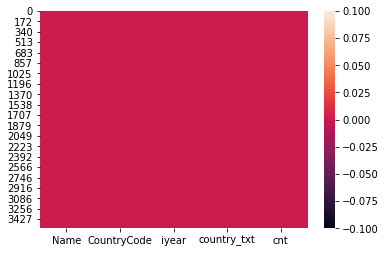

In [24]:
from seaborn import heatmap
heatmap(to_plot.isnull())

In [23]:
to_plot.dropna(inplace=True)

In [26]:
del to_plot['Name']
del to_plot['country_txt']

KeyError: 'Name'

In [30]:
to_plot.head(50)

,CountryCode,iyear,cnt
0,AFG,1973.0,1.0
1,AFG,1979.0,3.0
2,AFG,1987.0,1.0
3,AFG,1988.0,11.0
4,AFG,1989.0,10.0
5,AFG,1990.0,2.0
6,AFG,1991.0,30.0
7,AFG,1992.0,36.0
8,AFG,1994.0,9.0
9,AFG,1995.0,6.0


In [32]:
to_plot.to_csv('./dataset/tot_year+country',index=False)

In [19]:
import folium

country_geo = './dataset/world-countries.json'

# Setup a folium map at a high-level zoom

map = folium.Map(location=[53, 9], zoom_start=1.8)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations

folium.Choropleth(geo_data=country_geo, data=to_plot,
columns=['CountryCode','cnt'],
key_on='feature.id',
fill_opacity=0.7, line_opacity=0.5,
fill_color='YlOrRd',
legend_name='Events',
bins = 9).add_to(map)
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame('plot_data3.html', width=800, height=650)